Does PAH correctly pass from one cohort to another during the vertebrate aging in the Salish Sea Atlantis Model?

### Test Descriptions & Notes

Test scenarios
1. Beth added the following new code routines to atContaminants.c as of Atlantis version 6691: Age_Contaminants_Store and Age_Contaminants_Update

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import ssam_groups as groups
import ssam_plot as splot
from PIL import Image
import glob
from IPython.display import Image as img
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [17]:
control_name = 'v6693_16c'
test_name = 'v6699_16'
test2_name = 'v6699_16_flag_dissolved_pollutants0'
labels = [control_name,test_name,test2_name]
label = [test_name]

In [3]:
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/Test_Scenario_5b_"+ control_name + "/outputSalishSea.nc"
control = xr.open_dataset(str(control_file), decode_cf=True)

In [18]:
test_path = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/Test_Scenario_5b_" + test_name + "/outputSalishSea.nc"
test2_path = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/Test_Scenario_5b_" + test2_name + "/outputSalishSea.nc"
test = xr.open_dataset(str(test_path), decode_cf=True)
test2= xr.open_dataset(str(test2_path), decode_cf=True)

In [5]:
highres_name = 'v6693_16c_highres'
highres_path = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Spills/Test_Scenario_5b_" + highres_name + "/outputSalishSea.nc"
highres = xr.open_dataset(str(highres_path), decode_cf=True)
highres_time = np.ma.filled(highres.variables['t'], np.nan)

In [19]:
time = np.ma.filled(test.variables['t'], np.nan)

In [20]:
scenarios = [control, test, test2]
scen = [test]
cont = [control]
#hr = [highres]

### Functions

In [8]:
def tissue_vertebrate_concentration(group, pah, scenario):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for cohort in range(1,4):

            pelagic_oiled = np.ma.filled(scenario.variables[group[species] + str(cohort) + '_'  + pah][:,:,0:6], np.nan) # tonnes
            pelagic_oiled = pelagic_oiled.sum(axis=2) 
            pelagic_oiled = pelagic_oiled.sum(axis=1) 
            ax.plot(time, pelagic_oiled, linewidth = 2) #semilogy
        
        plt.ylabel('mg m$^{-3}$ '+str(pah), fontsize=12)
        ax.set_title(str(species))
    ax.legend(['cohort 1','cohort 2', 'cohort 3'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

In [9]:
def vertebrate_tissue_mass(group, pah, scenario, time = time):

    fig = plt.figure(figsize=(18, 18), facecolor='white')
    gs = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1])

    for species in group:
        
        bio_index = (list(group).index(species))

        if bio_index < 3:
            position = 0, bio_index
        elif bio_index > 5: 
            position = 2, bio_index-6
        else :
            position = 1, bio_index-3

        ax = fig.add_subplot(gs[position])

        for cohort in range(1,4):

            sp_oil_tbl = np.ma.filled(scenario.variables[group[species] + str(cohort) + '_' + pah][:,:,0:6], np.nan) # mgPAH/m3
            vol_tbl = np.ma.filled(scenario.variables['volume'][:,:,0:6], np.nan) # m3
            nums = np.ma.filled(scenario.variables[group[species] + str(cohort) + '_Nums'][:,:,0:6], np.nan)
            oil_mass_tbl = (sp_oil_tbl * vol_tbl) * (1/(nums+(nums==0))) # mg PAH / individual
            oil_mass_tb = oil_mass_tbl.mean(axis=2) #averaged over the water column
            oil_mass_t = oil_mass_tb.mean(axis=1) #averaged over the box
            ax.plot(time, oil_mass_t[0:time.size],linewidth = 2) #semilogy
        
        #plt.ylabel('mg '+str(pah)+' / mg N '+str(species), fontsize=12)
        plt.ylabel('mg '+str(pah)+' inside '+str(species), fontsize=12)
        ax.set_title(str(species))
    ax.legend(['cohort 1','cohort 2', 'cohort 3'], bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12);

### v6699_adjusted
with adjusted contaminant.c file, but with the old biology file, and flag_disscolved_contaminants turned OFF

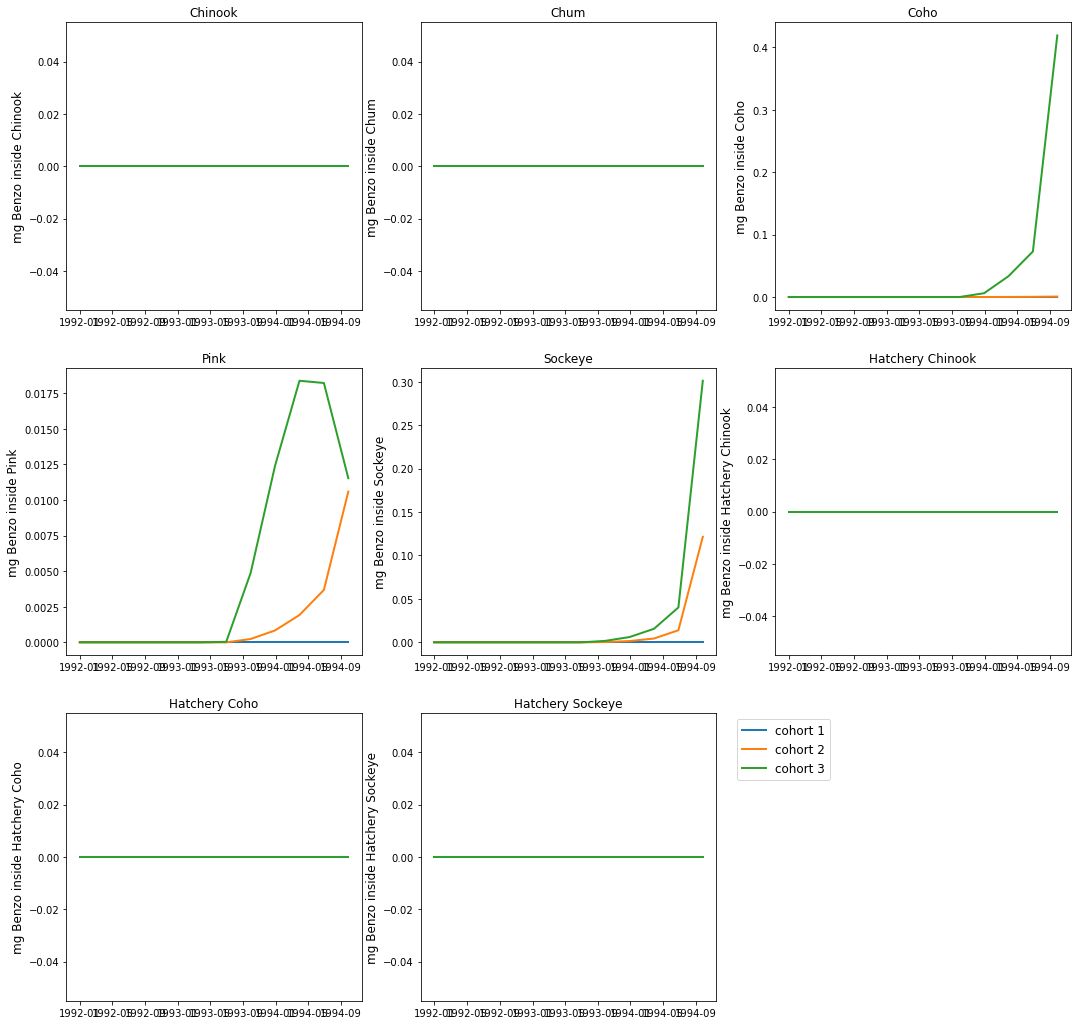

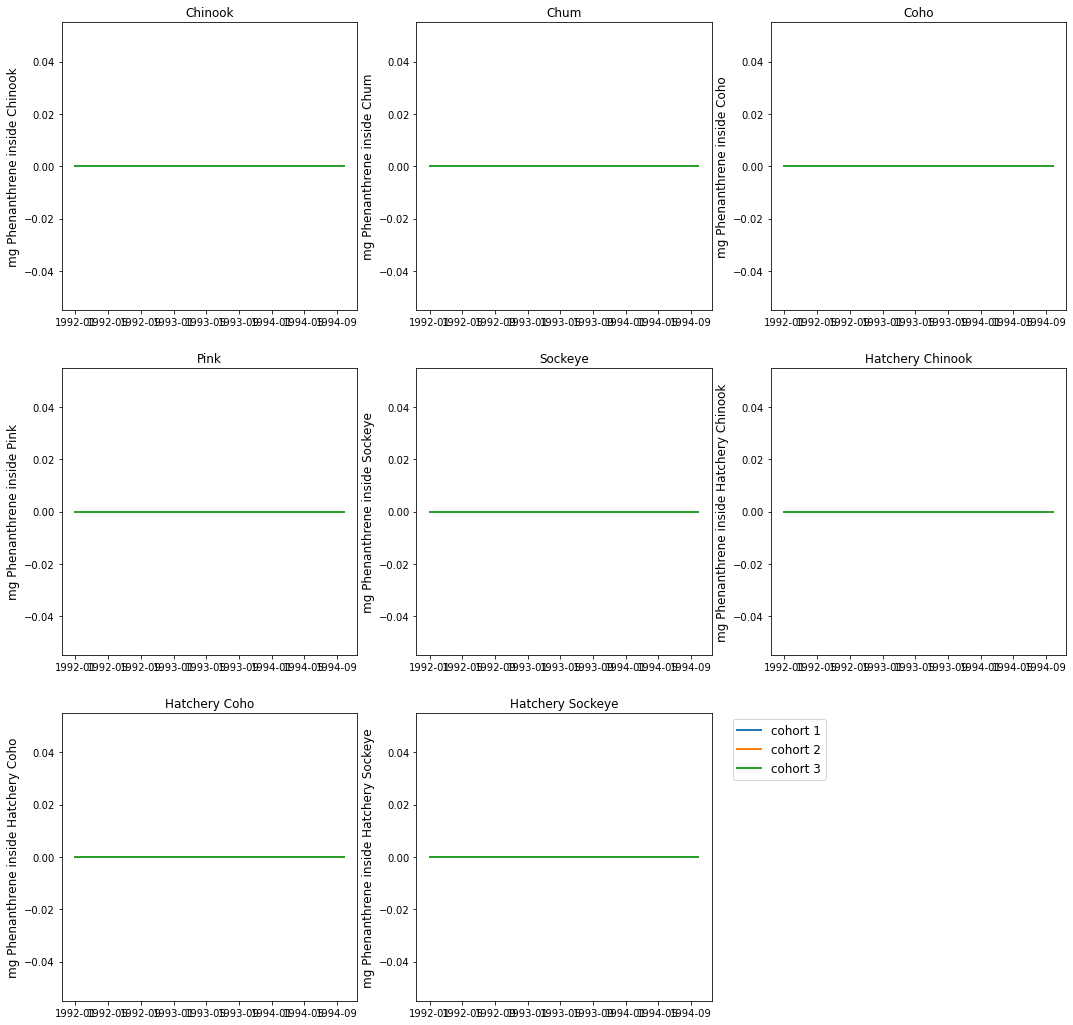

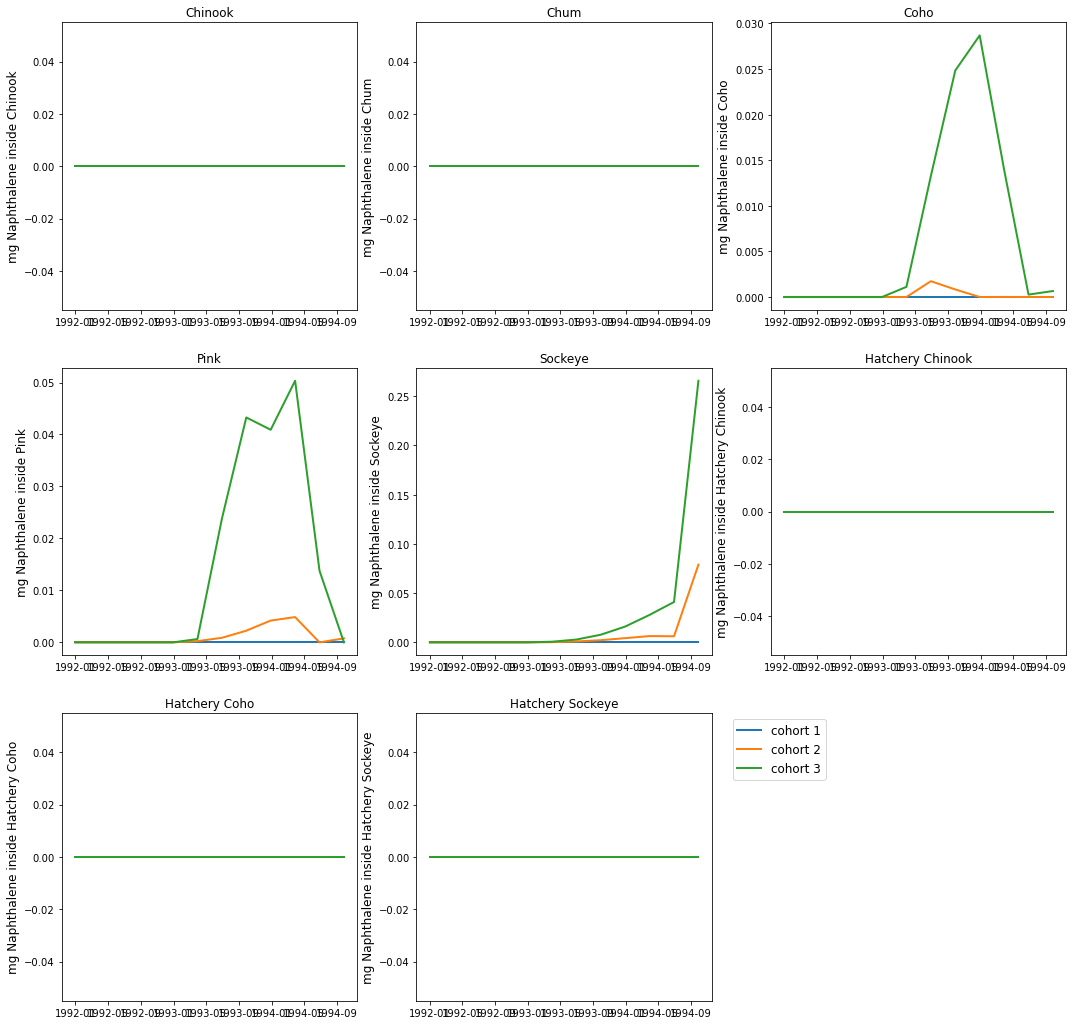

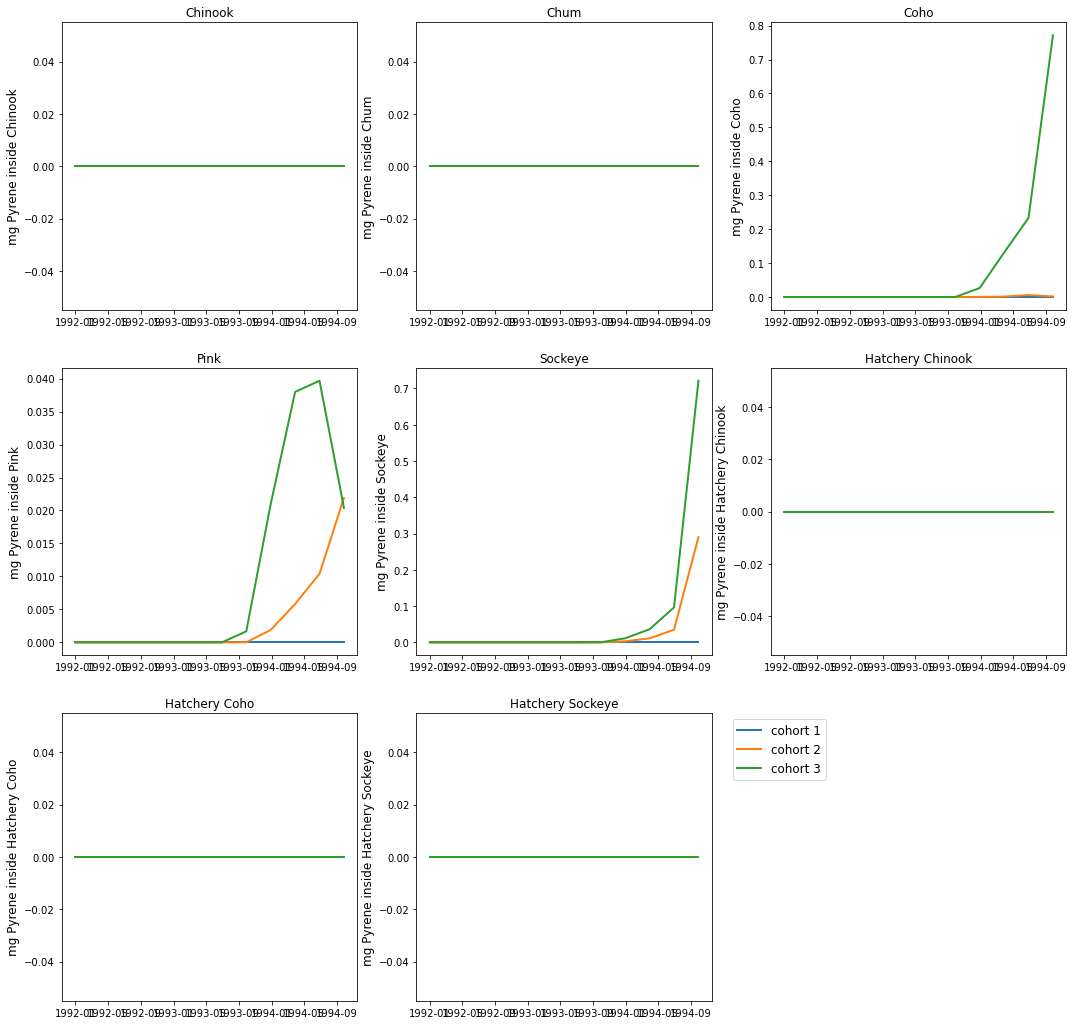

In [10]:
for pah in groups.pahs:
    vertebrate_tissue_mass(groups.salmon, pah, test)

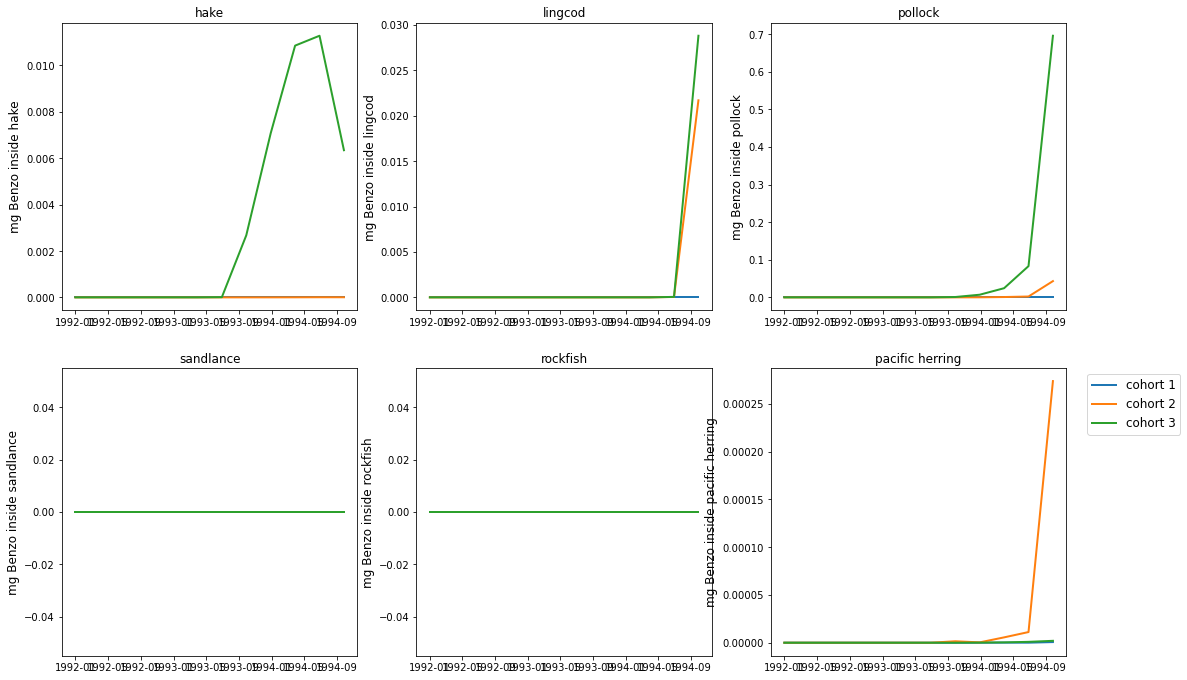

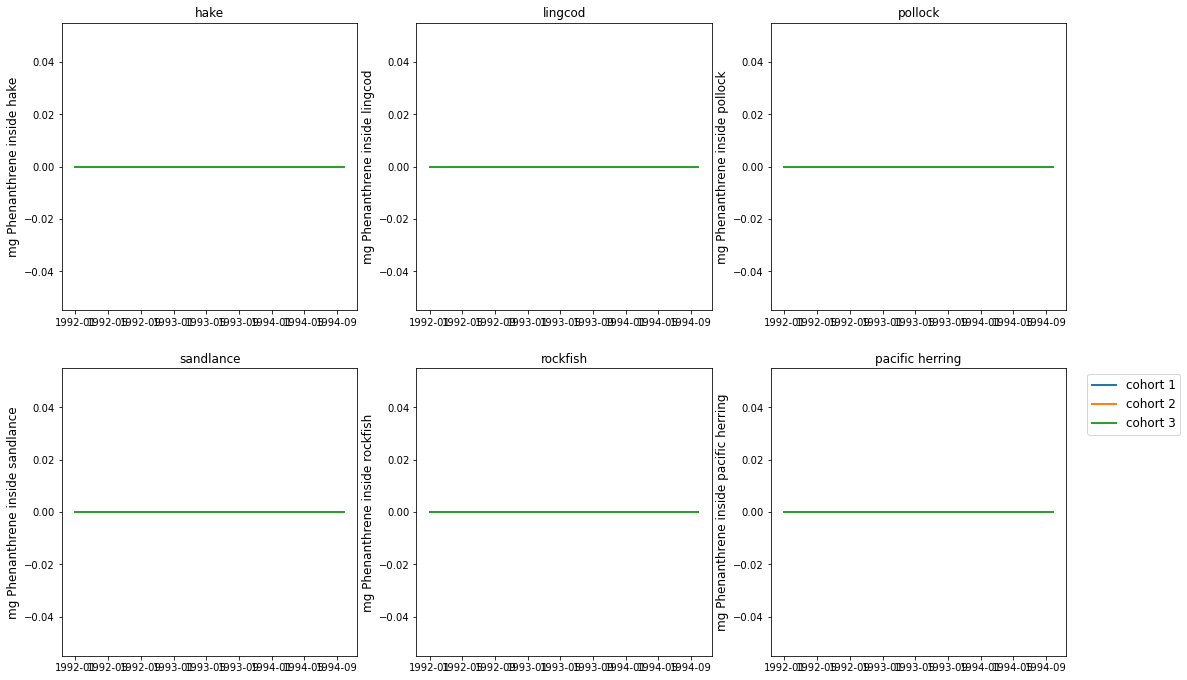

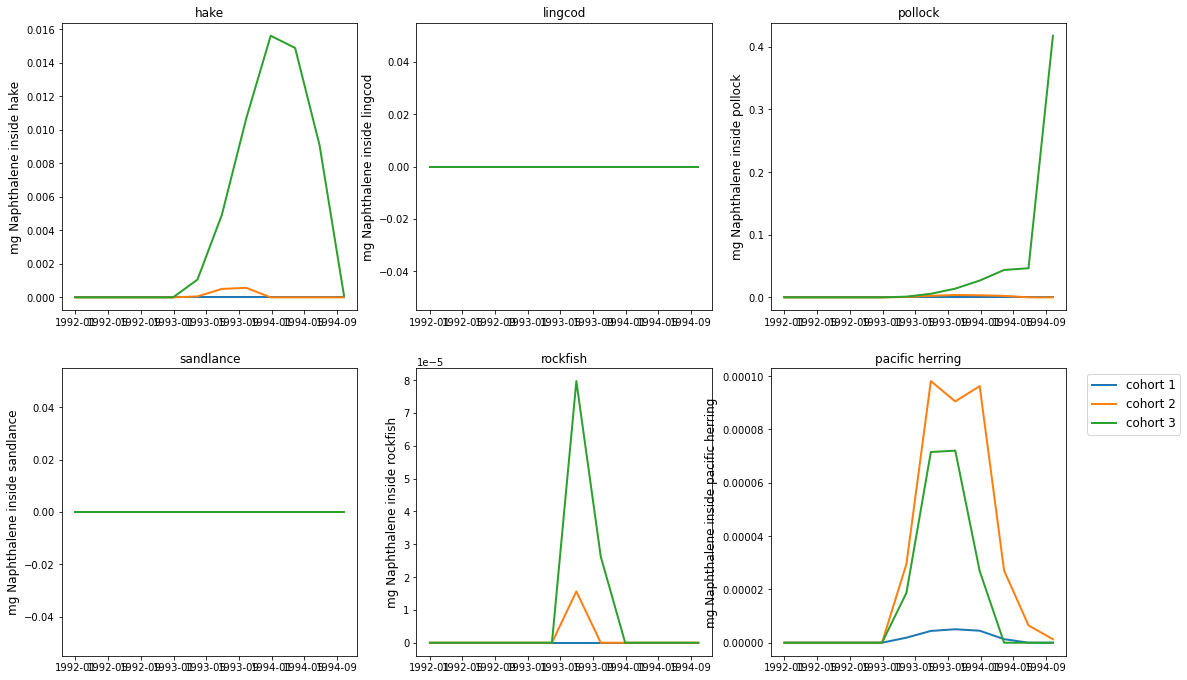

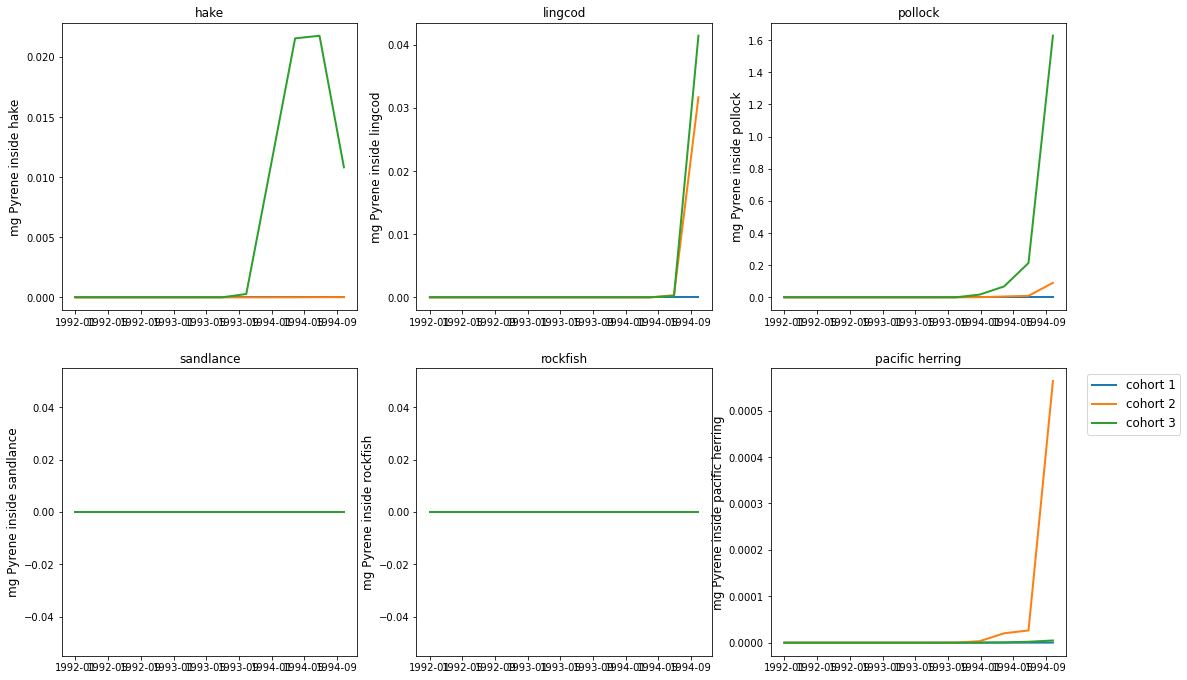

In [11]:
for pah in groups.pahs:
    vertebrate_tissue_mass(groups.named_fish, pah, test)

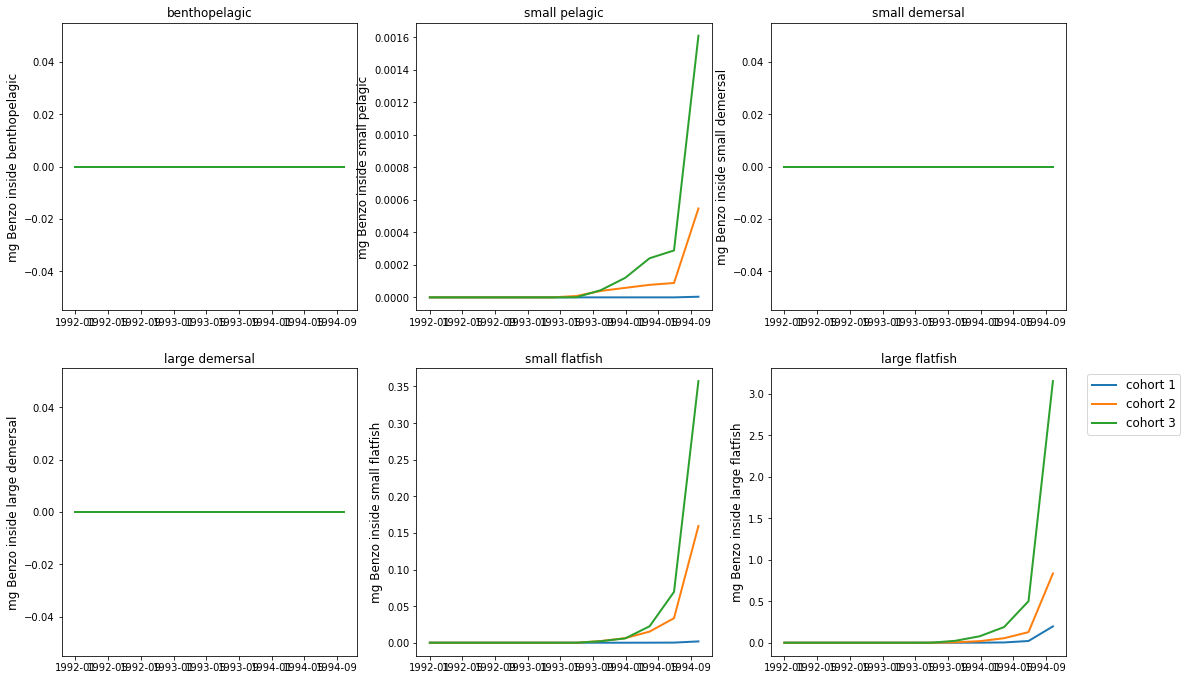

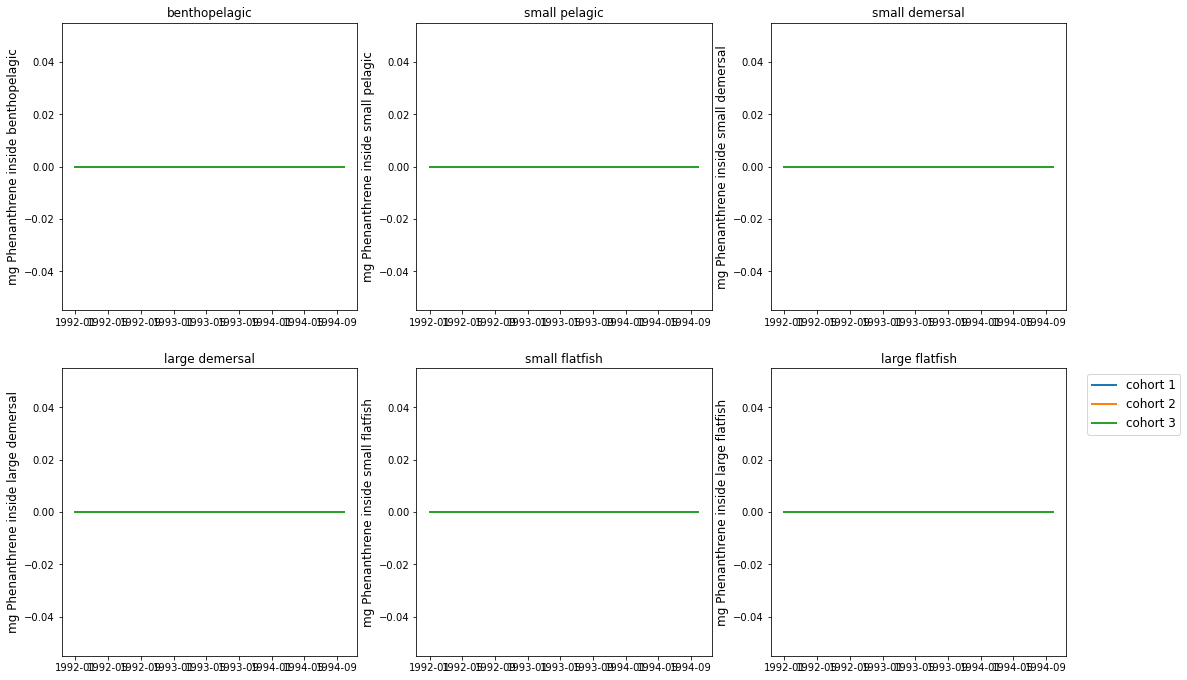

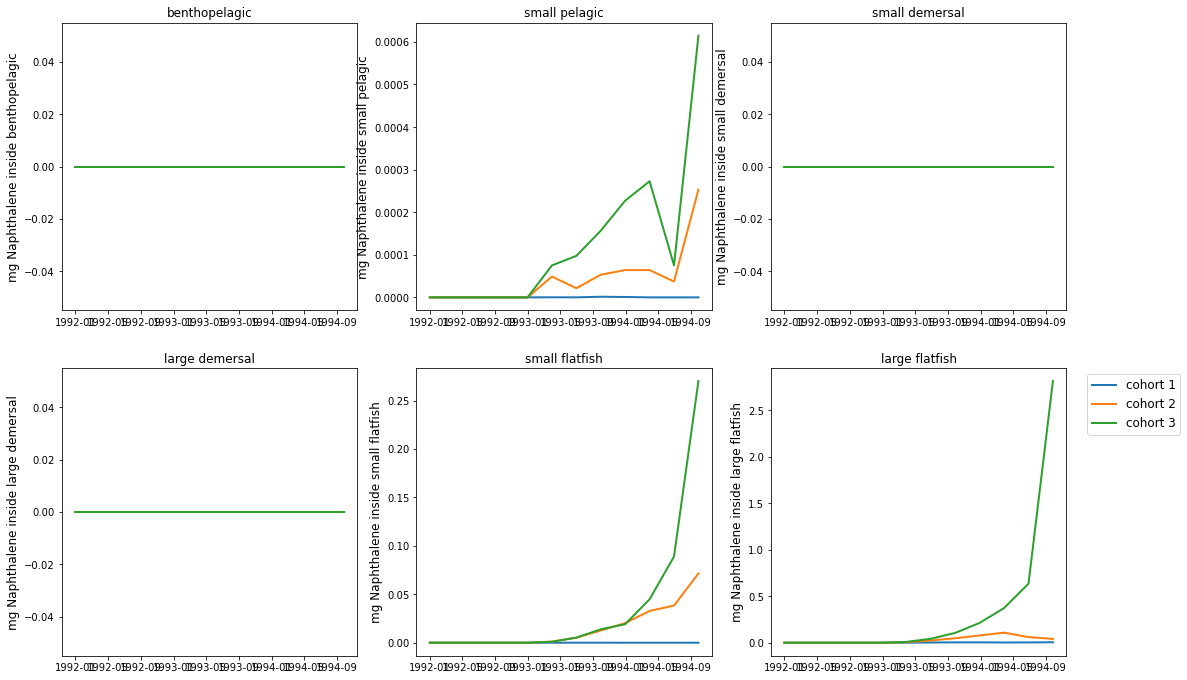

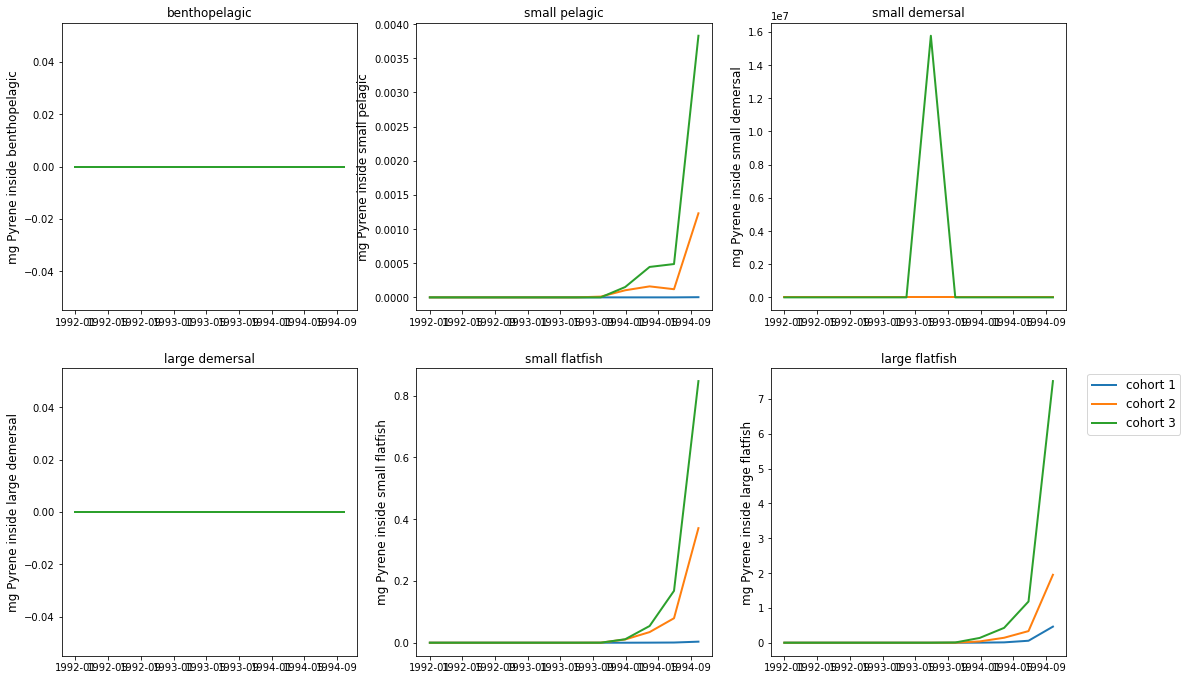

In [12]:
for pah in groups.pahs:
    vertebrate_tissue_mass(groups.other_fish, pah, test)

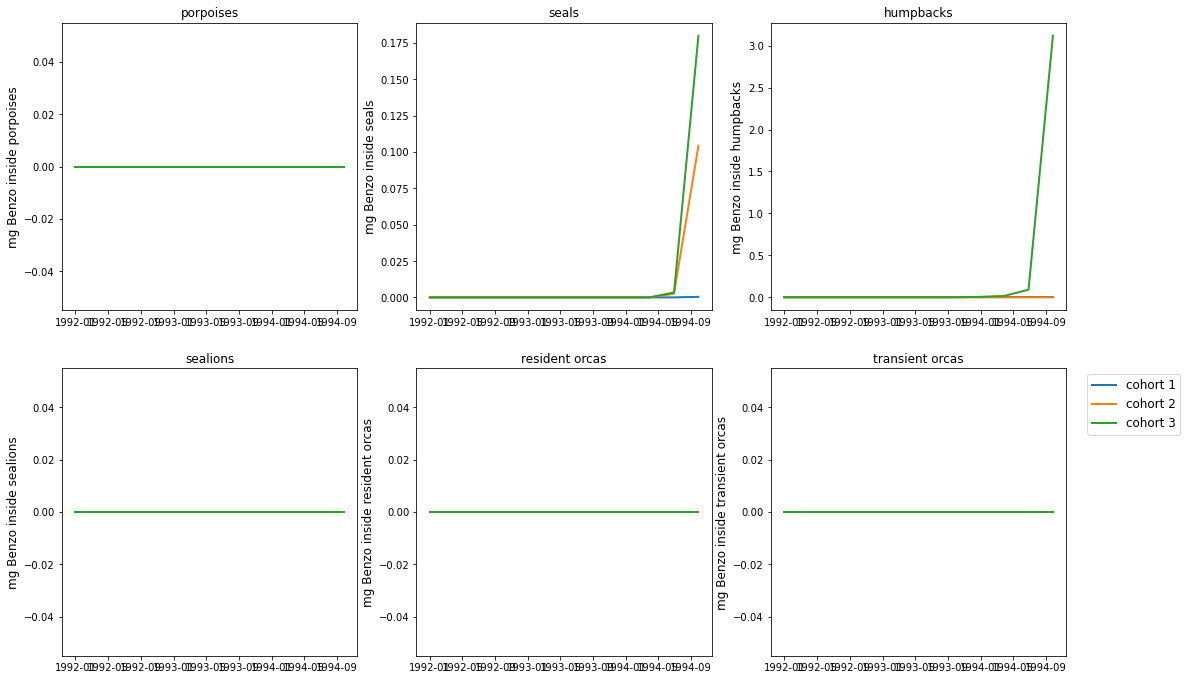

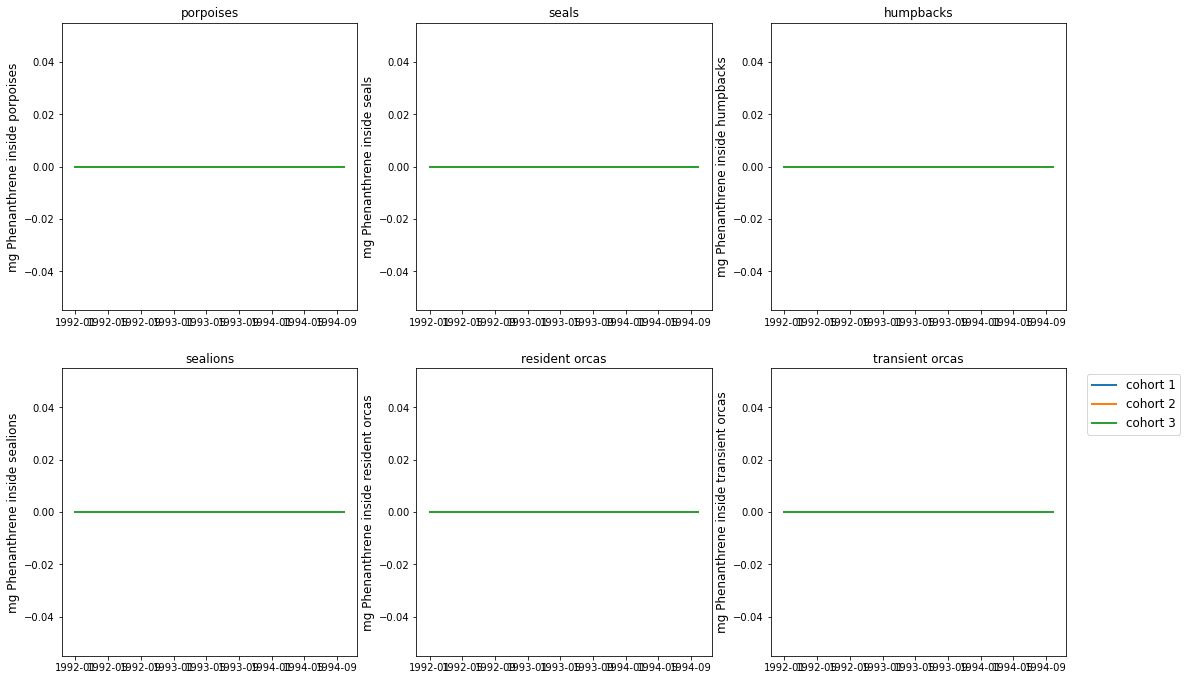

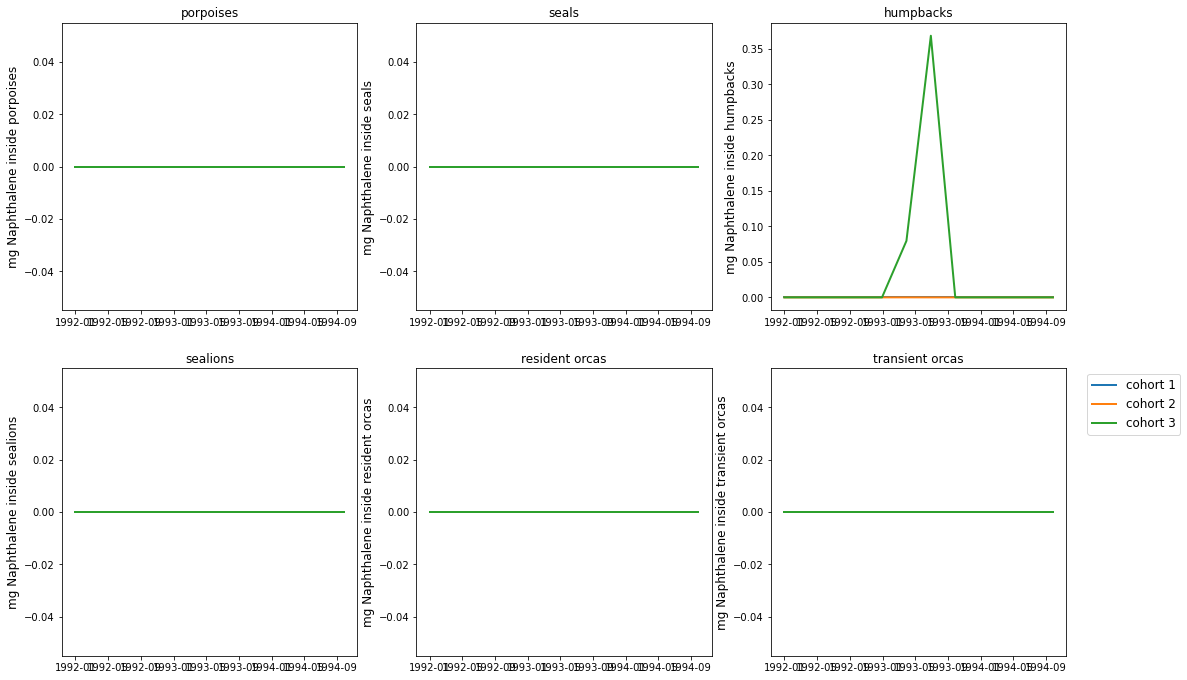

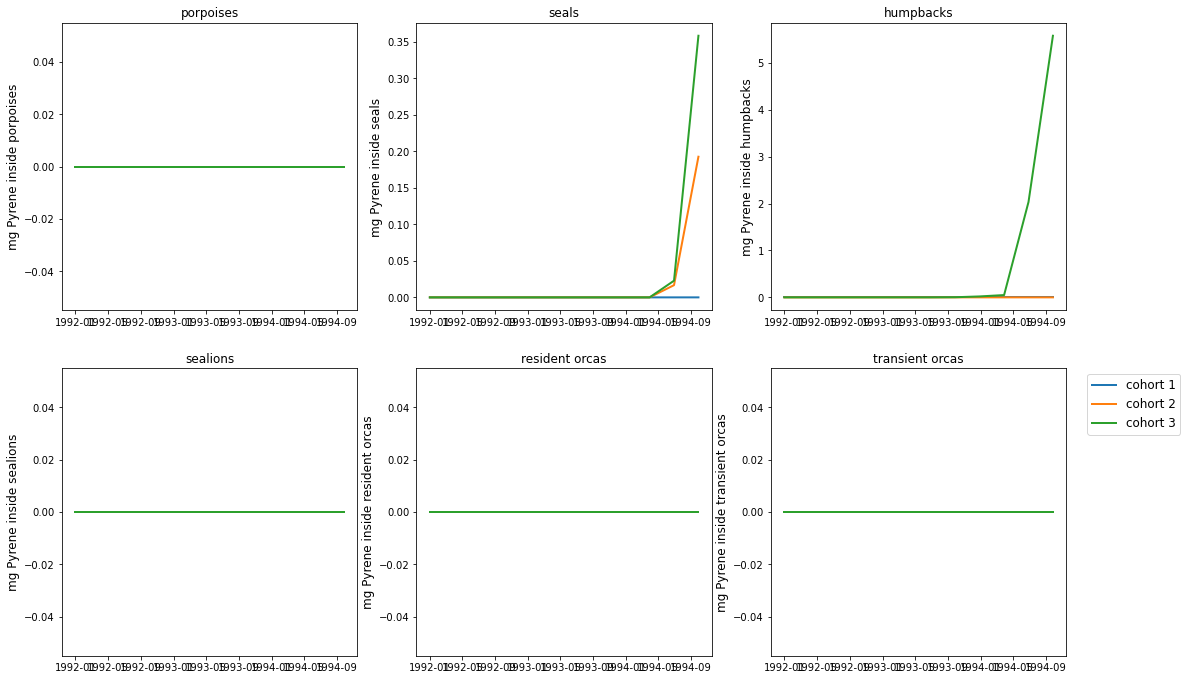

In [13]:
for pah in groups.pahs:
    vertebrate_tissue_mass(groups.mammals, pah, test)

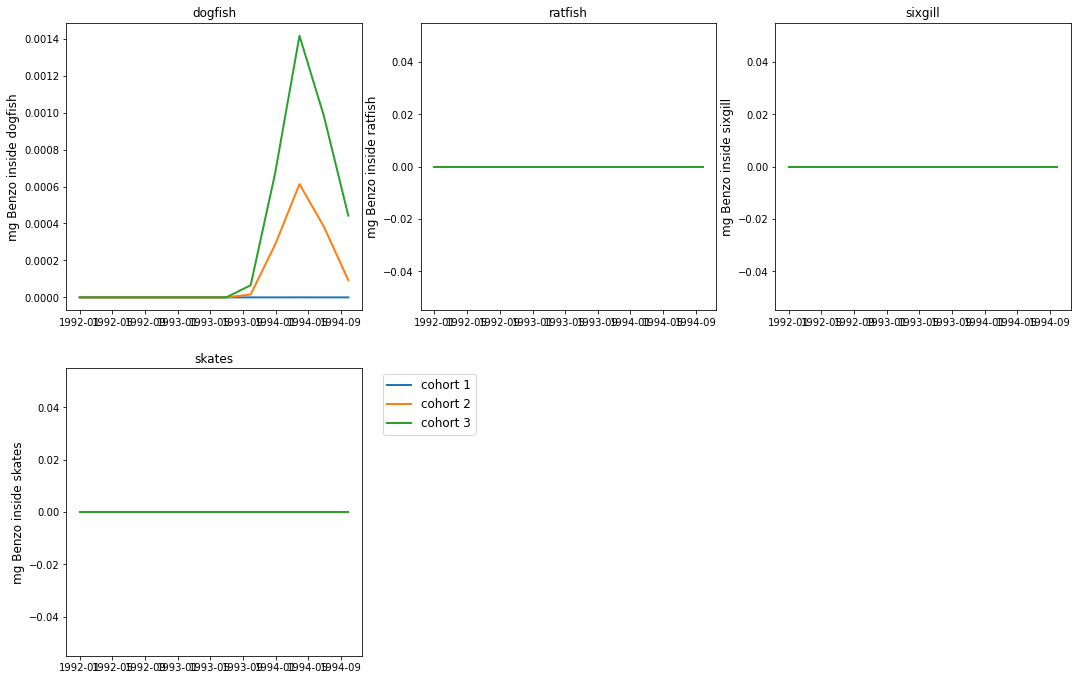

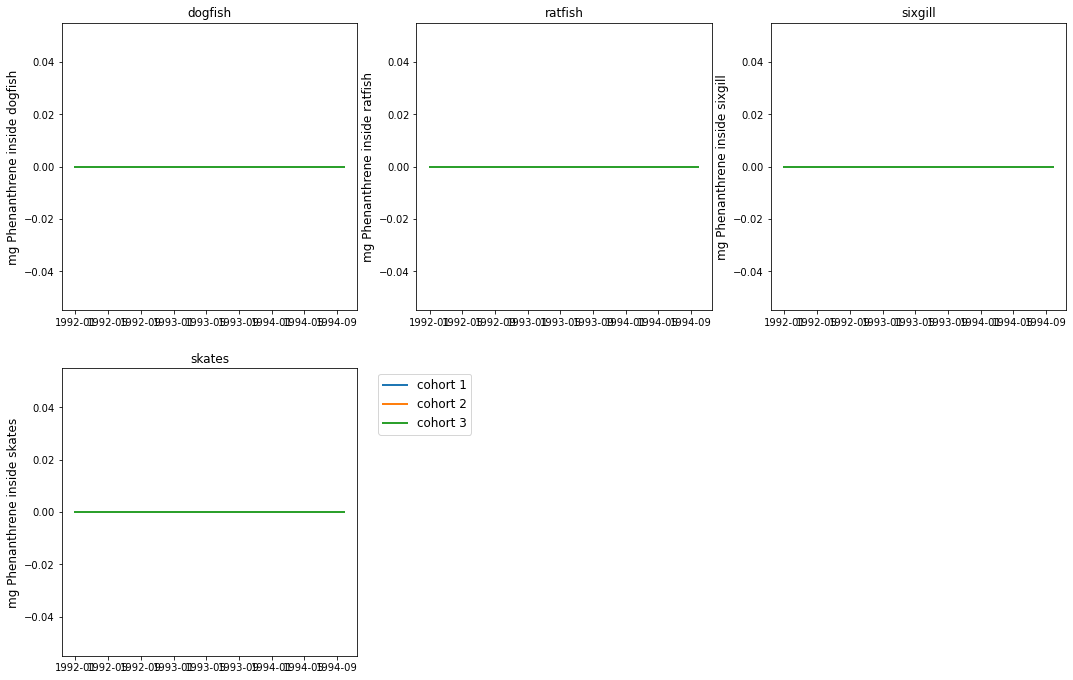

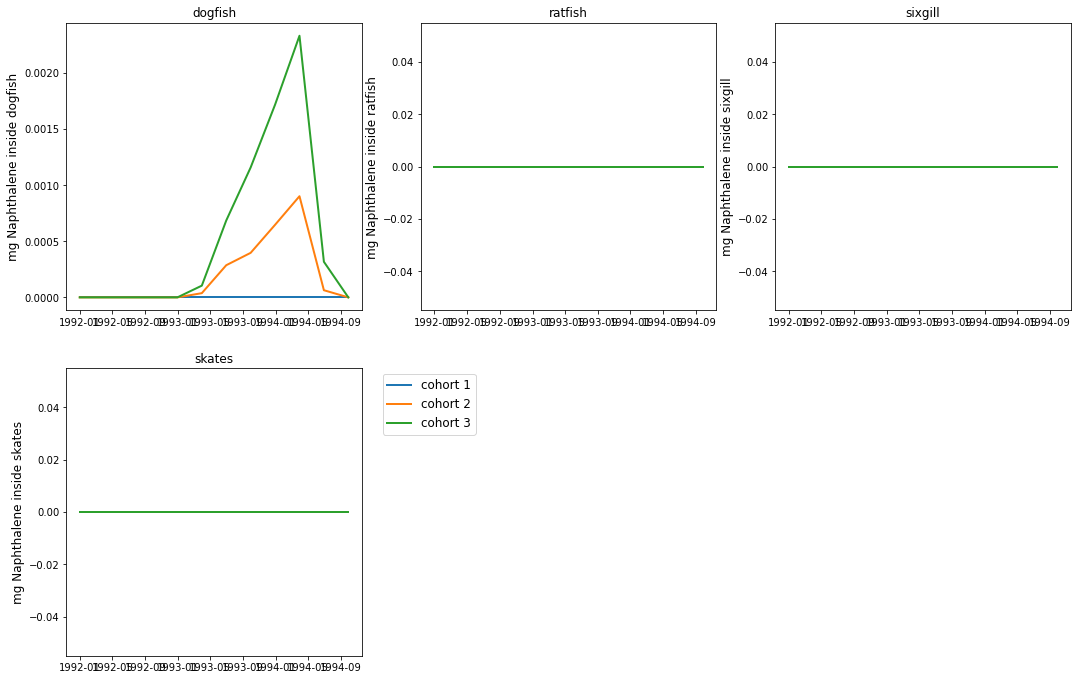

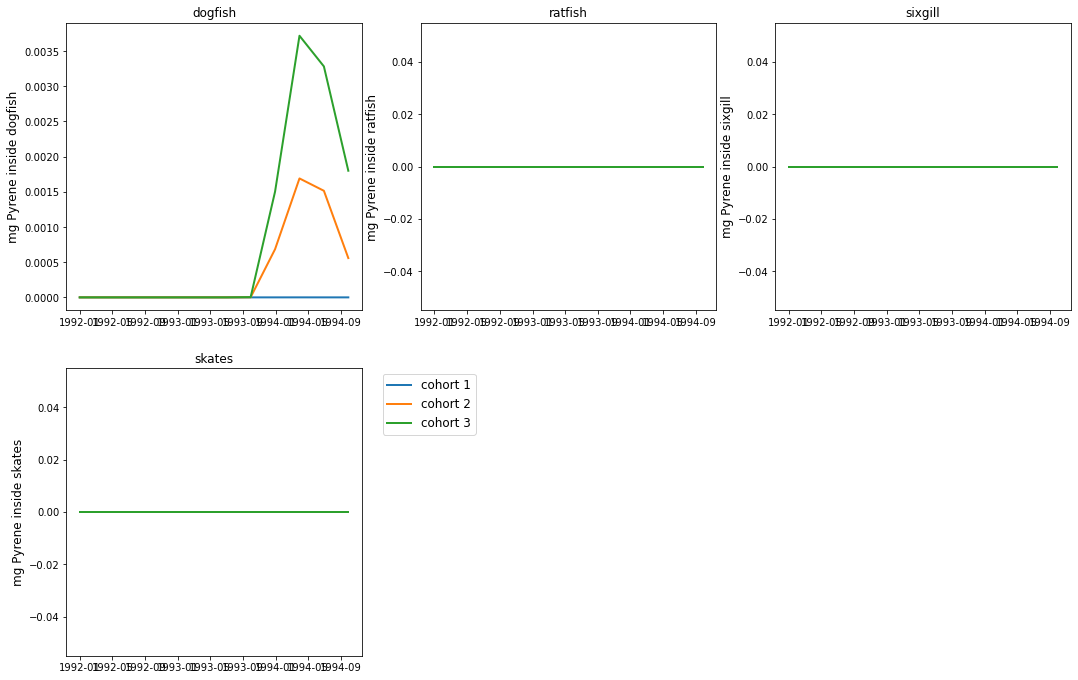

In [14]:
for pah in groups.pahs:
    vertebrate_tissue_mass(groups.sharks, pah, test)

### v6699_16
with adjusted contaminant.c file, flag_dissolved_contaminants turned ON, and better calibrated 00SS_biology.prm file

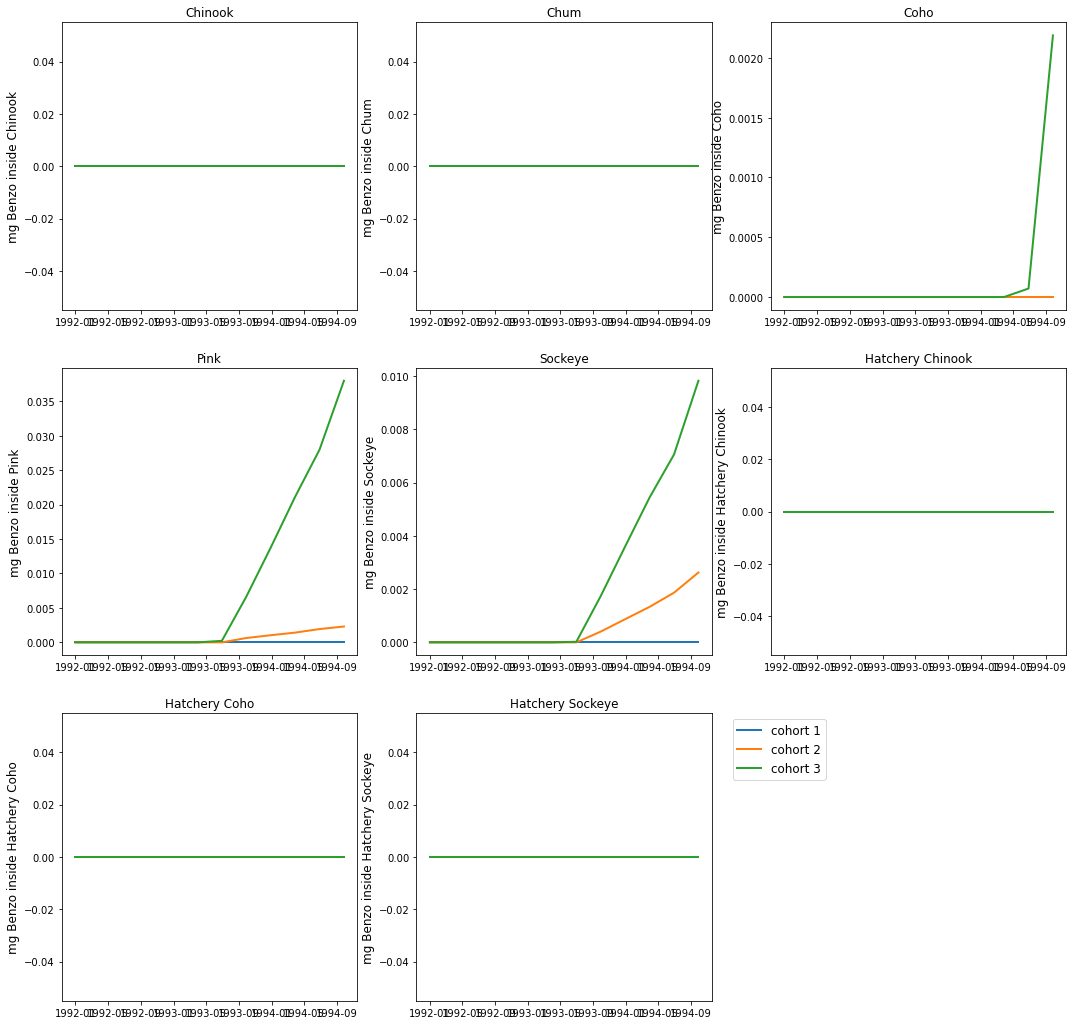

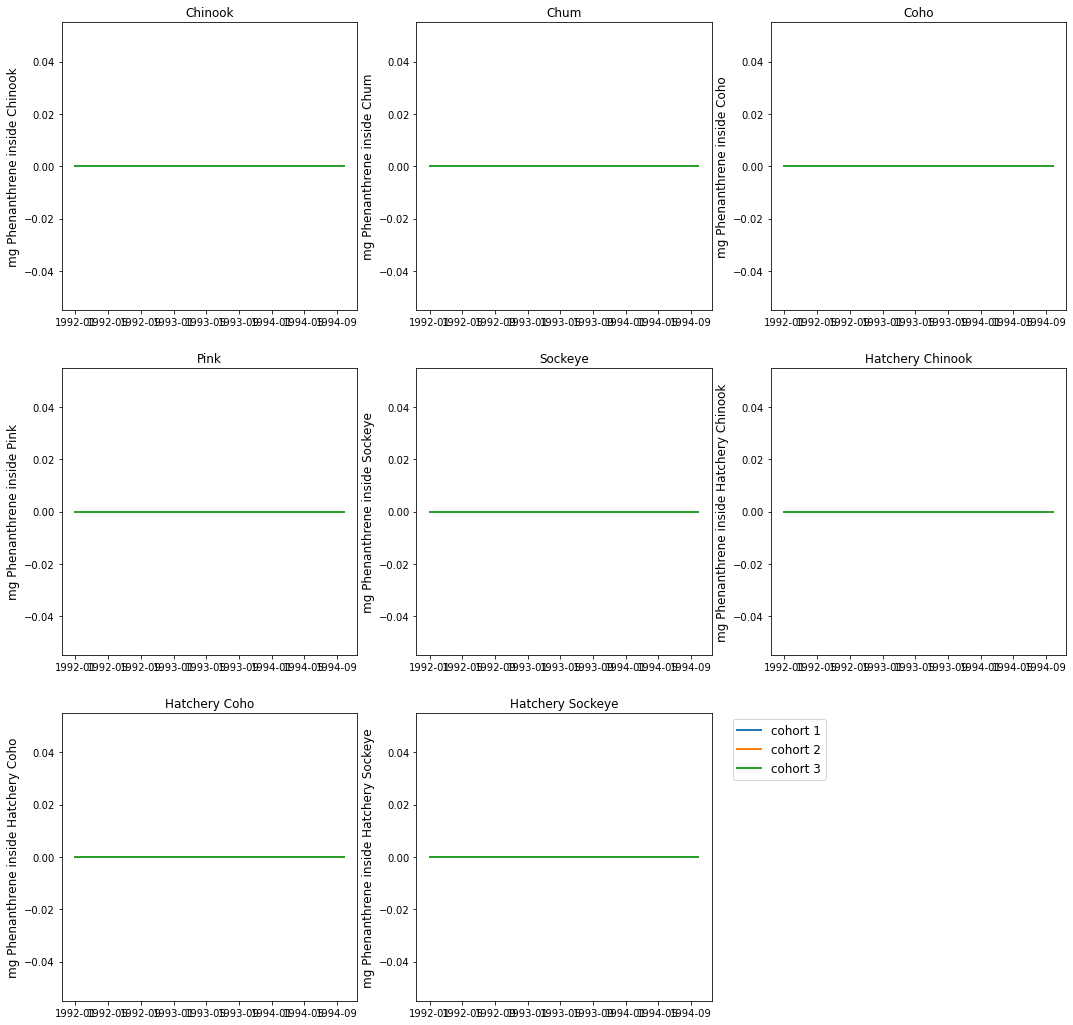

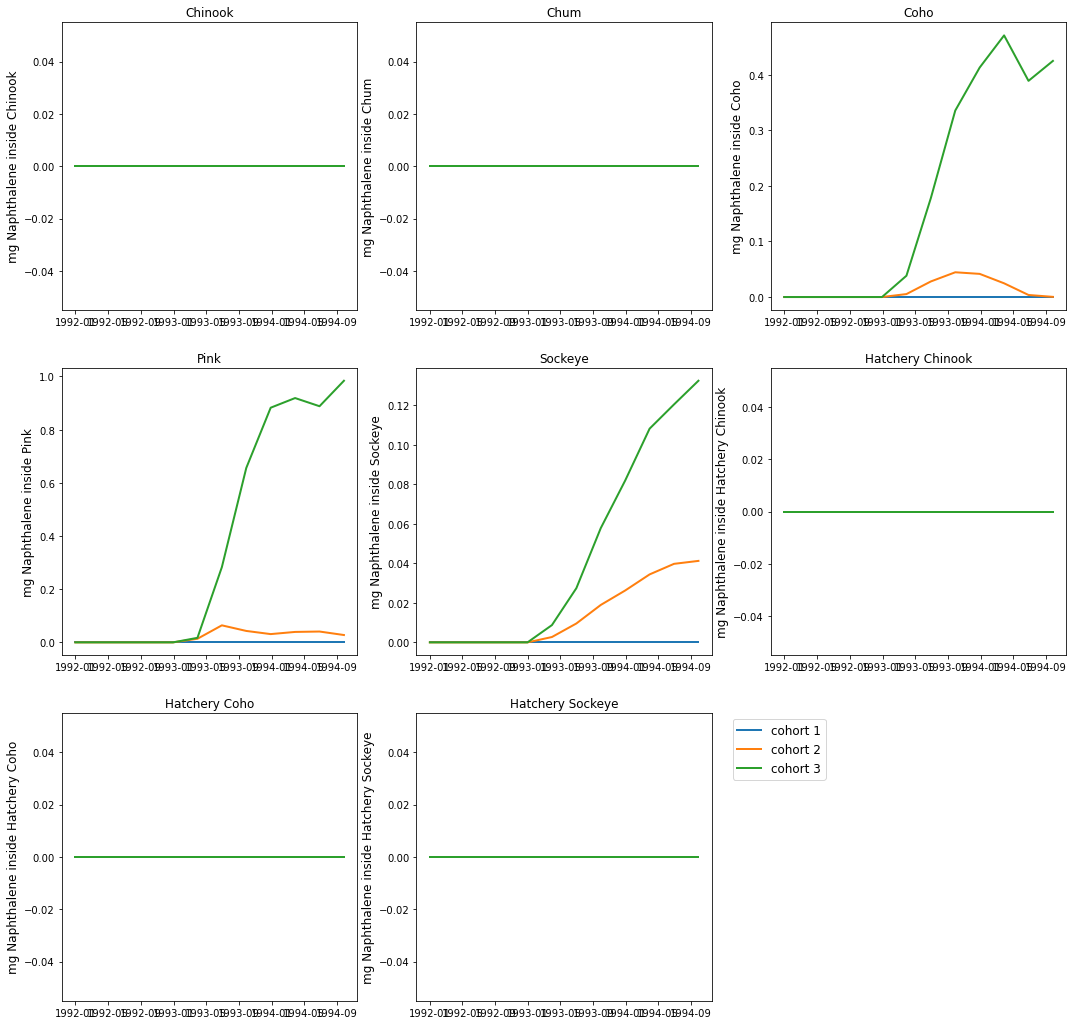

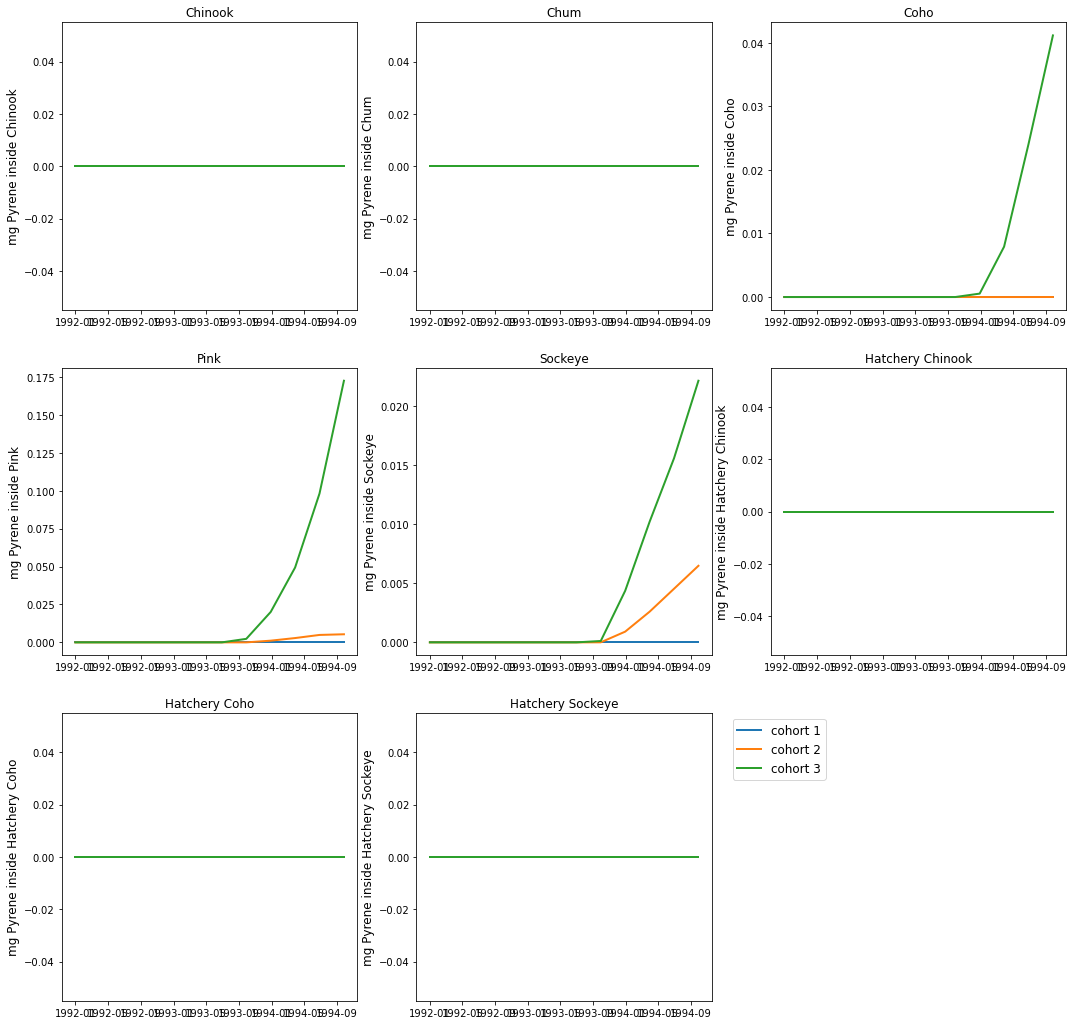

In [21]:
for pah in groups.pahs:
    vertebrate_tissue_mass(groups.salmon, pah, test)

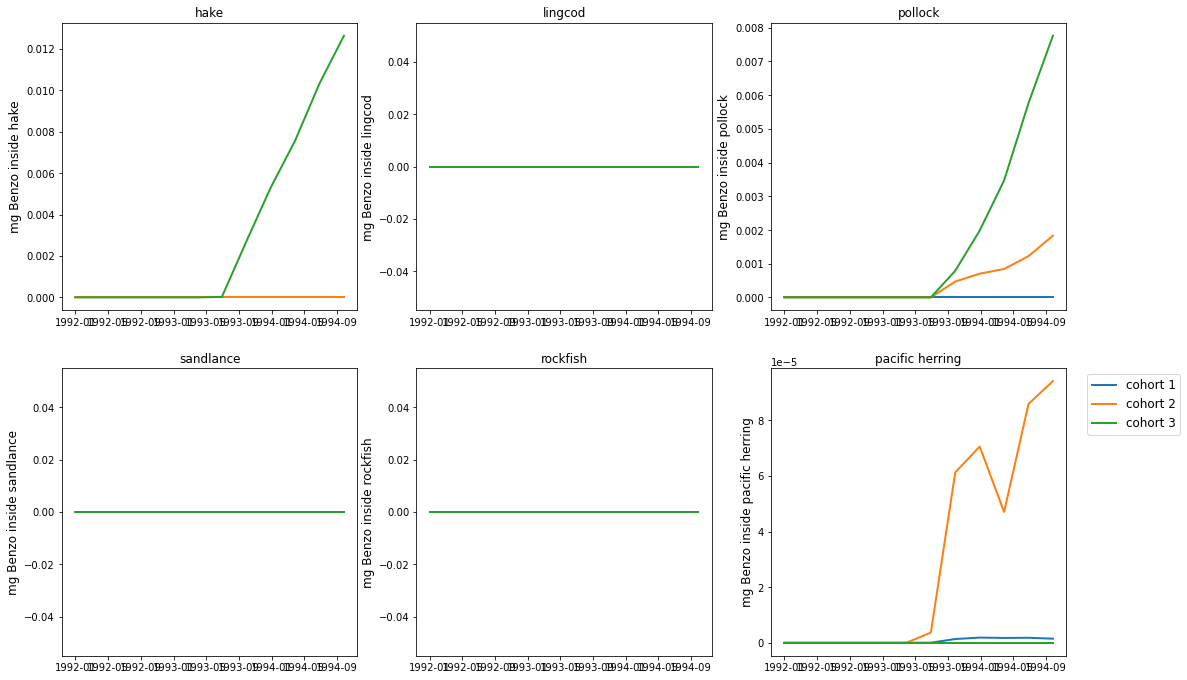

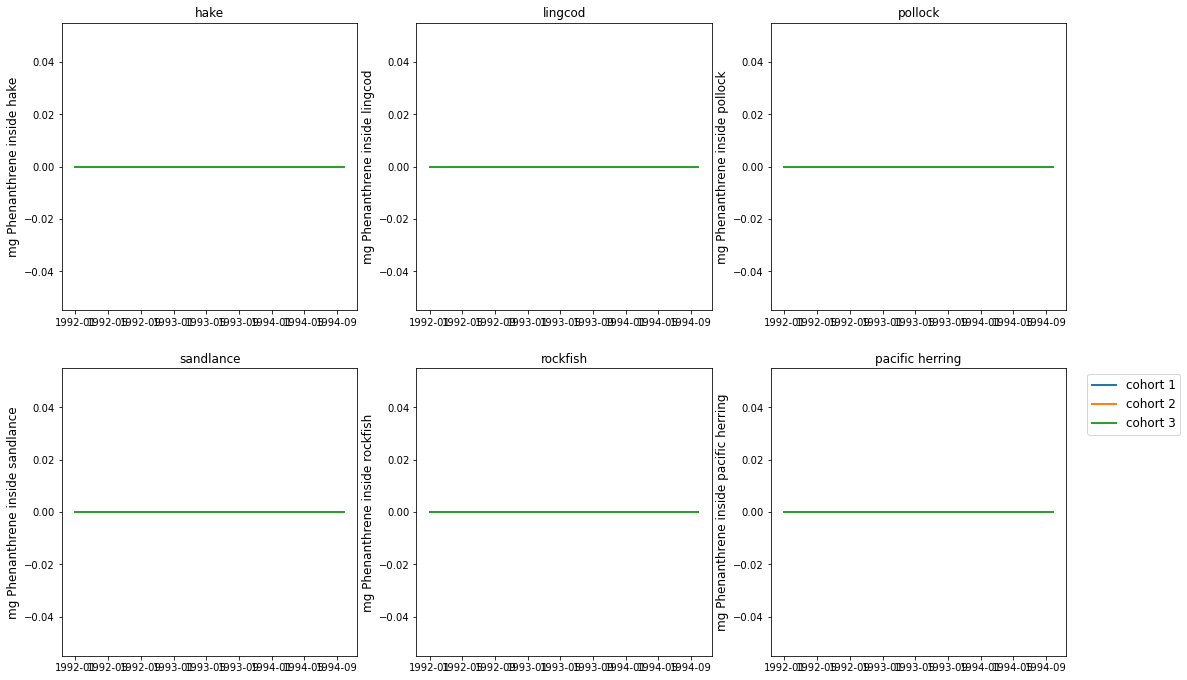

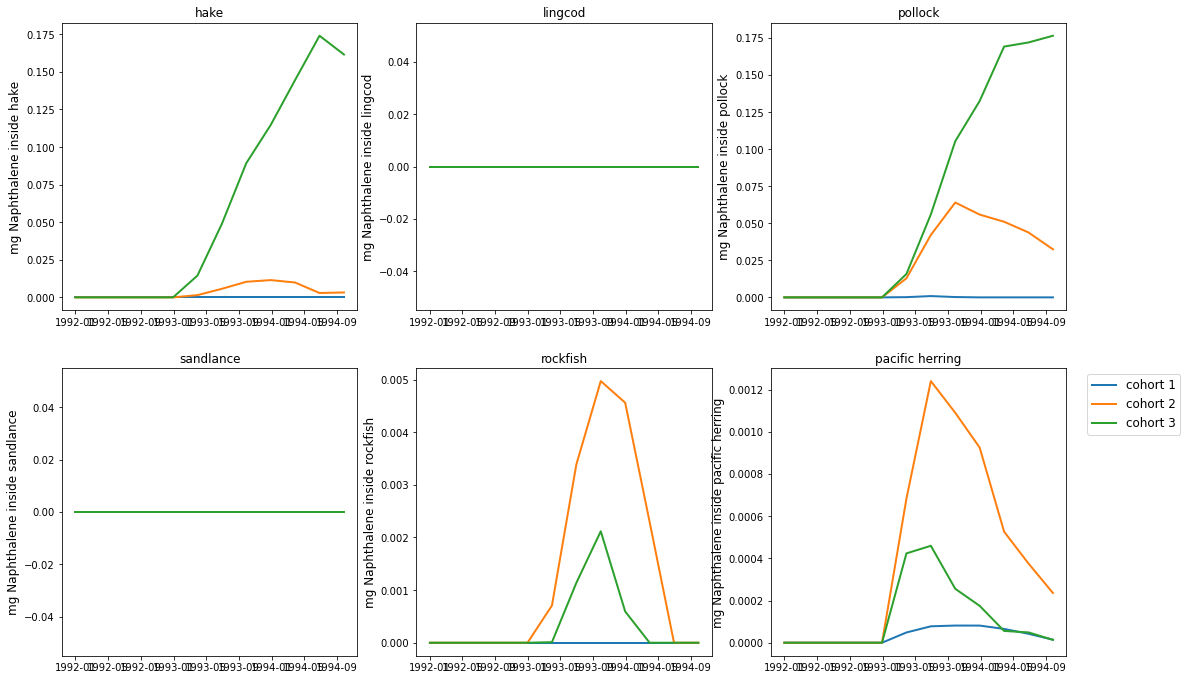

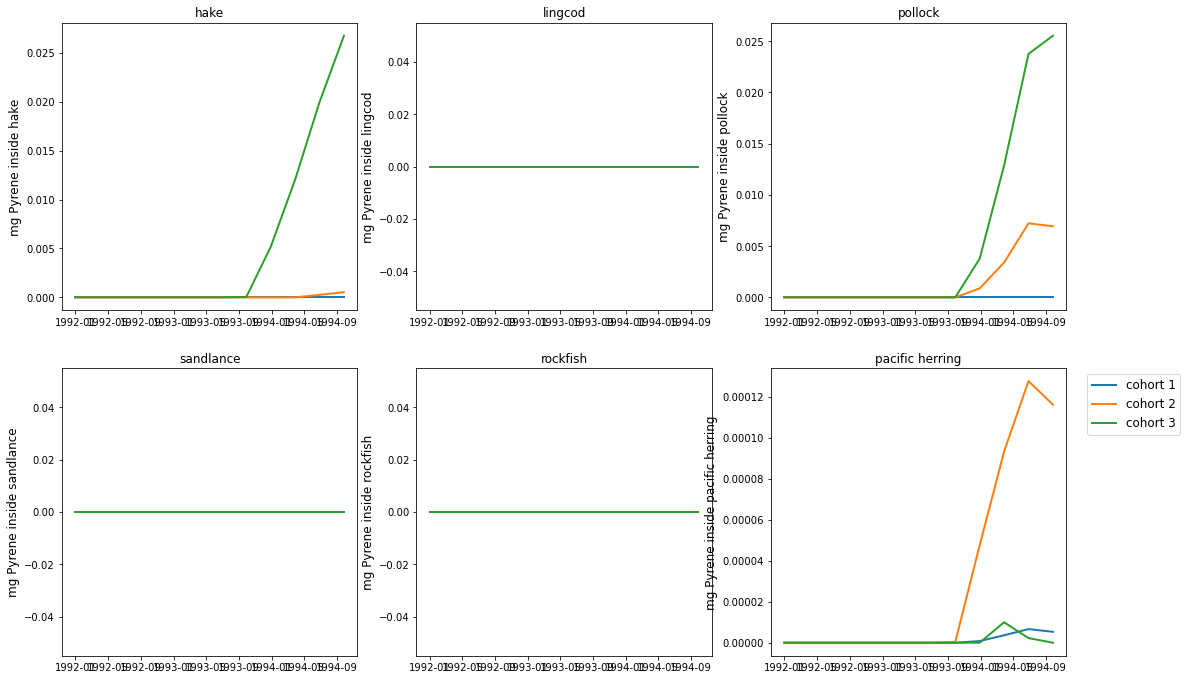

In [22]:
for pah in groups.pahs:
    vertebrate_tissue_mass(groups.named_fish, pah, test)